# Recommender Movies Systems

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("movies_dataset.csv")

# Exploratory Data Anaylsis

In [3]:
# lets try to look the data
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [4]:
# lets try to check the shape of data
df.shape

(4803, 24)

In [5]:
# check the column names of data
print(df.columns.tolist())

['index', 'budget', 'genres', 'homepage', 'id', 'keywords', 'original_language', 'original_title', 'overview', 'popularity', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'vote_average', 'vote_count', 'cast', 'crew', 'director']


In [6]:
# lets try to check the general information of all columns in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

In [7]:
# lets try to check the missing values of each column in a dataset 
df.isnull().sum()

index                      0
budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
dtype: int64

## Descriptive Anaylsis

In [8]:
'''
The describe method shows basic statistical characteristics of each numerical feature (int64 and float64 types):
number of non-missing values, mean, standard deviation,range, median, 0.25 and 0.75 quartiles. 

'''
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,4803.0,2.401000e+03,1.386651e+03,0.0,1200.50000,2.401000e+03,3.601500e+03,4.802000e+03
budget,4803.0,2.904504e+07,4.072239e+07,0.0,790000.00000,1.500000e+07,4.000000e+07,3.800000e+08
id,4803.0,5.716548e+04,8.869461e+04,5.0,9014.50000,1.462900e+04,5.861050e+04,4.594880e+05
popularity,4803.0,2.149230e+01,3.181665e+01,0.0,4.66807,1.292159e+01,2.831350e+01,8.755813e+02
revenue,4803.0,8.226064e+07,1.628571e+08,0.0,0.00000,1.917000e+07,9.291719e+07,2.787965e+09
runtime,4801.0,1.068759e+02,2.261193e+01,0.0,94.00000,1.030000e+02,1.180000e+02,3.380000e+02
vote_average,4803.0,6.092172e+00,1.194612e+00,0.0,5.60000,6.200000e+00,6.800000e+00,1.000000e+01
vote_count,4803.0,6.902180e+02,1.234586e+03,0.0,54.00000,2.350000e+02,7.370000e+02,1.375200e+04


In [9]:
'''
In order to see statistics on non-numerical features, one has to explicitly indicate data types of interest
in the include parameter.

'''
df.describe(include=['bool','object']).T

,count,unique,top,freq
genres,4775,1168,Drama,370
homepage,1712,1691,http://www.missionimpossible.com/,4
keywords,4391,4219,independent film,55
original_language,4803,37,en,4505
original_title,4803,4801,Out of the Blue,2
overview,4800,4800,"In the 22nd century, a paraplegic Marine is di...",1
production_companies,4803,3697,[],351
production_countries,4803,469,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2977
release_date,4802,3280,2006-01-01,10
spoken_languages,4803,544,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",3171


## Data Visualization

In [10]:
#list for catagorical columns
cat_cols = []
#list for numerical columns
num_cols = []
#list for binary columns
binary_cols = []

for i in df.columns:
    if df[i].dtypes =='object' and df[i].nunique() != 2:
        cat_cols.append(i)        
    else:
        if df[i].nunique() == 2:
            binary_cols.append(i)
        else:
            num_cols.append(i) 

In [11]:
print(cat_cols)
print("Length of catagorical columns : ",len(cat_cols))

['genres', 'homepage', 'keywords', 'original_language', 'original_title', 'overview', 'production_companies', 'production_countries', 'release_date', 'spoken_languages', 'status', 'tagline', 'title', 'cast', 'crew', 'director']
Length of catagorical columns :  16


In [12]:
print(num_cols)
print("Length of numerical columns : ",len(num_cols))

['index', 'budget', 'id', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']
Length of numerical columns :  8


In [13]:
print(binary_cols)
print("Length of binary columns : ",len(binary_cols))

[]
Length of binary columns :  0


Length of catagorical columns :  16
Length of numerical columns :  8
Length of binary columns :  0


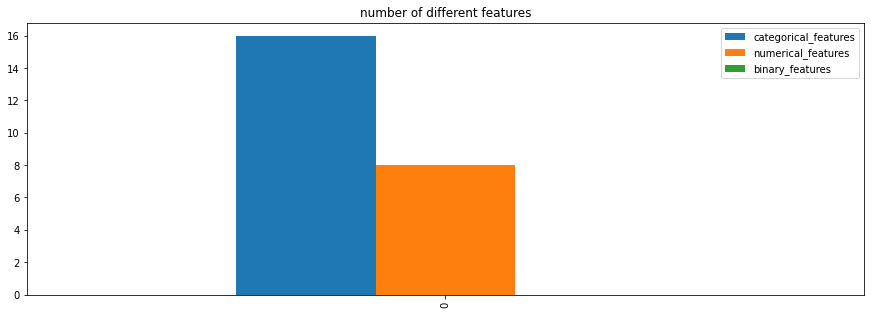

In [14]:
print("Length of catagorical columns : ",len(cat_cols))
print("Length of numerical columns : ",len(num_cols))
print("Length of binary columns : ",len(binary_cols))

categories_list = []
categories_list.append(len(cat_cols))
categories_list.append(len(num_cols))
categories_list.append(len(binary_cols))

categories_df = pd.DataFrame(categories_list, 
                             index=["categorical_features", "numerical_features", "binary_features"])

categories_df = categories_df.transpose().plot(kind="bar", figsize=(15, 5), title="number of different features")

## Distribution of numerical variables

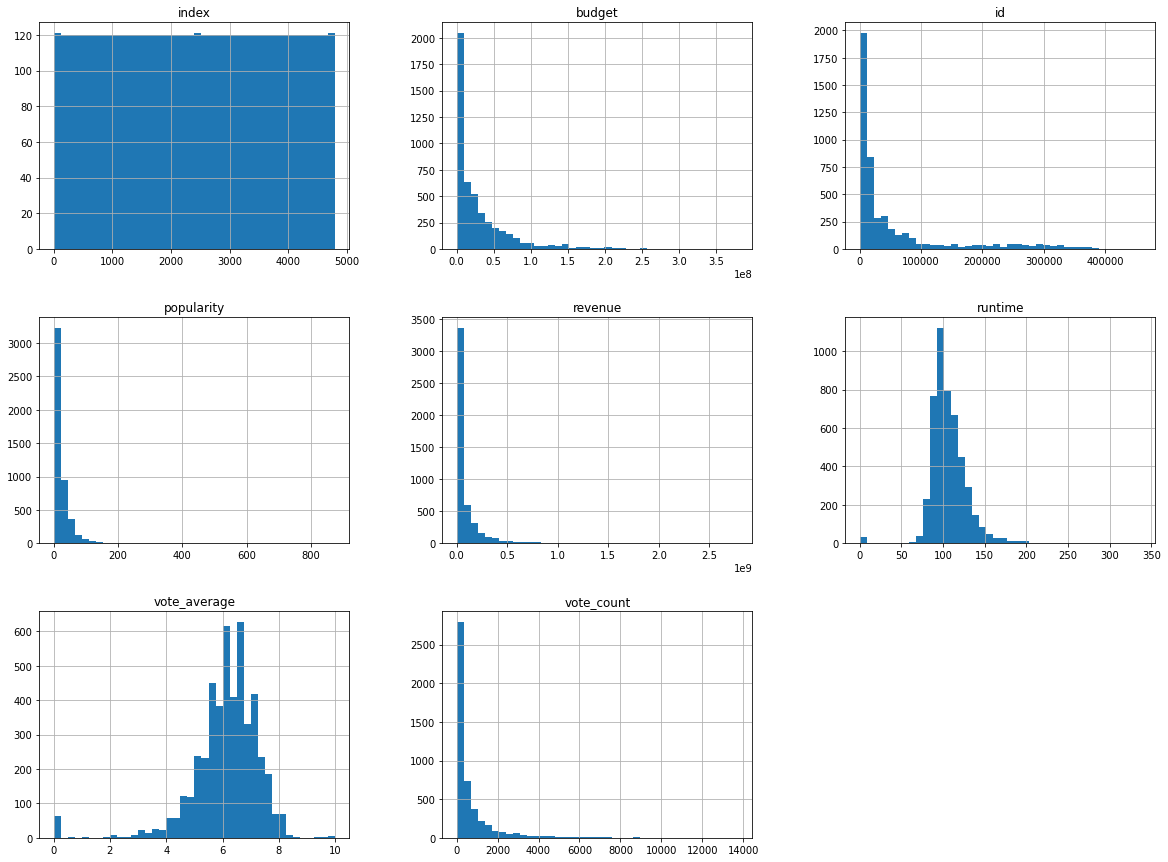

In [15]:
# Overall idea about distribution of data histogram numeric columns
df.hist(bins=40, figsize=(20,15))
plt.show()

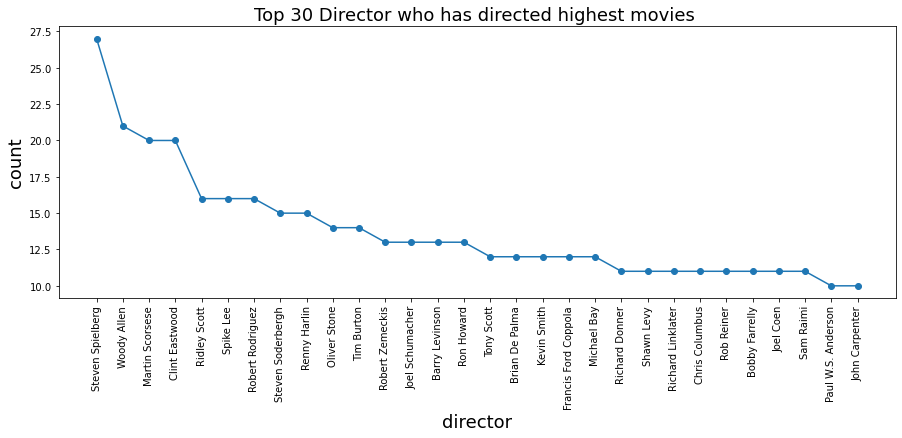

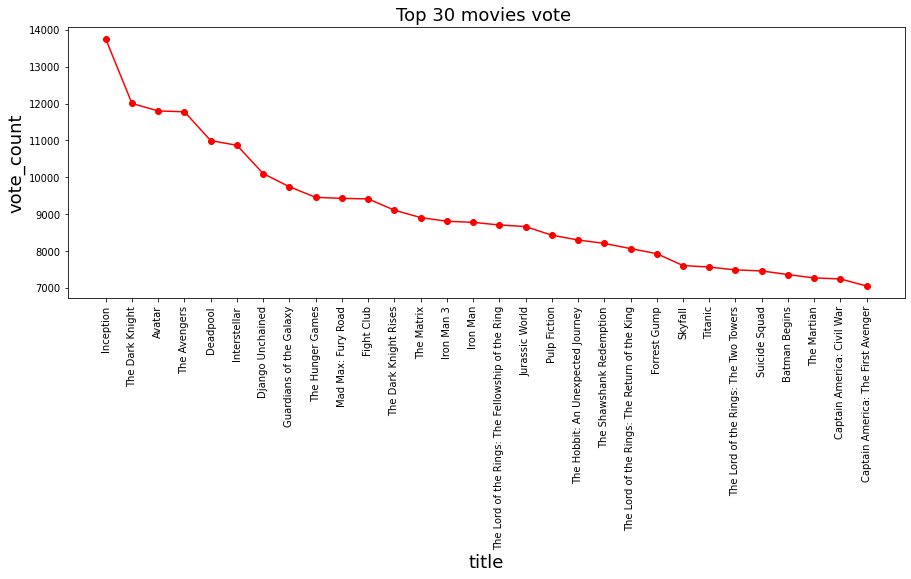

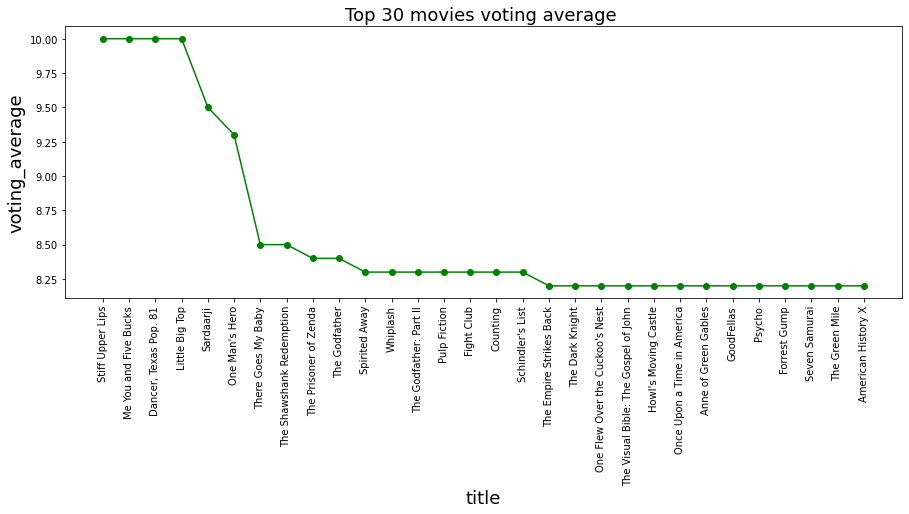

In [16]:
plt.figure(figsize=(15,5))
plt.plot(df['director'].value_counts()[:30].index.tolist(),df['director'].value_counts()[:30].tolist(), marker='o')
plt.title("Top 30 Director who has directed highest movies ", fontsize=18)
plt.xlabel("director", fontsize=18)
plt.ylabel("count", fontsize=18)
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(15,5))
v = df[['title','vote_count']].sort_values(by='vote_count',ascending=False)
plt.plot(v['title'][:30].tolist(),v['vote_count'][:30].tolist(), marker='o',c='r')
plt.title("Top 30 movies vote ", fontsize=18)
plt.xlabel("title", fontsize=18)
plt.ylabel("vote_count", fontsize=18)
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(15,5))
vA = df[['title','vote_average']].sort_values(by='vote_average',ascending=False)
plt.plot(vA['title'][:30].tolist(),vA['vote_average'][:30].tolist(), marker='o',c='g')
plt.title("Top 30 movies voting average ", fontsize=18)
plt.xlabel("title", fontsize=18)
plt.ylabel("voting_average", fontsize=18)
plt.xticks(rotation=90)
plt.show()

## Feature Engineering,Data Preprocessing

In [17]:
''' 
lets try to check the percentage of missing values,unique values,percentage of one catagory values 
and type against each column.

'''
stats = []
for col in df.columns:
    stats.append((col, df[col].nunique(), df[col].isnull().sum() * 100 / df.shape[0], df[col].value_counts(normalize=True, dropna=False).values[0] * 100, df[col].dtype))
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 'percentage high one category values', 'type'])
stats_df.sort_values('Percentage of missing values', ascending=False)

,Feature,Unique_values,Percentage of missing values,percentage high one category values,type
3,homepage,1691,64.355611,64.355611,object
17,tagline,3944,17.572351,17.572351,object
5,keywords,4219,8.577972,8.577972,object
21,cast,4741,0.895274,0.895274,object
23,director,2349,0.624610,0.624610,object
2,genres,1168,0.582969,7.703519,object
8,overview,4800,0.062461,0.062461,object
14,runtime,156,0.041641,3.393712,float64
12,release_date,3280,0.020820,0.208203,object
9,popularity,4802,0.000000,0.041641,float64


In [18]:
# we have a lots of features, we will select these 4 features and then recommended the movie based on these features
features = ['keywords','cast','genres','director']

In [19]:
# lets try to check the missing values in these features
df[features].isnull().sum()

keywords    412
cast         43
genres       28
director     30
dtype: int64

In [20]:
# fill the missing values with empty string
df[features] = df[features].fillna('')

In [21]:
# now we can see that no missing values
df[features].isnull().sum()

keywords    0
cast        0
genres      0
director    0
dtype: int64

In [22]:
# combined all these features into a single string
df['combined_features'] = df['keywords'].str.lower()+" "+df['cast'].str.lower()+" "+df['genres'].str.lower()+" "+df['director'].str.lower()

In [23]:
df['combined_features'][:5]

0    culture clash future space war space colony so...
1    ocean drug abuse exotic island east india trad...
2    spy based on novel secret agent sequel mi6 dan...
3    dc comics crime fighter terrorist secret ident...
4    based on novel mars medallion space travel pri...
Name: combined_features, dtype: object

## Importing Libraries

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [25]:
# lets try to convert the string into matrix form
cv = CountVectorizer()
count_matrix = cv.fit_transform(df["combined_features"]) 

In [26]:
# lets try to find the cosine similarity of a matrix
cosine_sim = cosine_similarity(count_matrix)

In [27]:
# define a function for get the similar movies
def get_title_from_index(index):
    return df[df.index == index]["title"].values[0]
def get_index_from_title(title):
    return df[df.title == title]["index"].values[0]
def recommended_movies(movie_name, top_similar_movies=3):
    movie_user_likes = movie_name
    if movie_name not in df['title'].tolist():
        print("invalid movie name")
    else:
        movie_index = get_index_from_title(movie_user_likes)
        similar_movies = list(enumerate(cosine_sim[movie_index]))
        sorted_similar_movies = sorted(similar_movies,key=lambda x:x[1],reverse=True)[1:]
        i=0
        print("Top "+ str(top_similar_movies) + " similar movies to "+movie_user_likes+" are:\n")
        for element in sorted_similar_movies:
            print(get_title_from_index(element[0]))
            i=i+1
            if i>top_similar_movies:
                break


In [28]:
# lets try to get the similar movies against Avatar movie
recommended_movies('Avatar',10)

Top 10 similar movies to Avatar are:

Guardians of the Galaxy
Aliens
Star Wars: Clone Wars: Volume 1
Star Trek Into Darkness
Star Trek Beyond
Alien
Lockout
Jason X
The Helix... Loaded
Moonraker
Planet of the Apes


In [29]:
# lets try to get the similar movies against The Dark Knight Rise movie
recommended_movies('The Dark Knight Rises',10)

Top 10 similar movies to The Dark Knight Rises are:

Batman Begins
The Dark Knight
Amidst the Devil's Wings
The Killer Inside Me
The Prestige
Batman Returns
Batman
Batman & Robin
Kick-Ass
RockNRolla
Kick-Ass 2
